In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [230]:
#read data
contributions = pd.read_csv("contributions.csv")
dem = pd.read_csv("rawdata/dem_candidates.csv")
rep = pd.read_csv("rawdata/rep_candidates.csv")

In [231]:
#binarize
dem['Won Primary 0_1'] = dem['Won Primary'].replace('No',0).replace('Yes',1) # outcome of election

rep['Won Primary 0_1'] = rep['Won Primary'].replace('No',0).replace('Yes',1) # outcome of election


In [232]:
#group donations by candidate
total_contributions = contributions.groupby(["Candidate ID"]).sum()
total_contributions.reset_index(inplace=True)
total_contributions = total_contributions.rename(columns={'Transaction amt':'Total donations'})

In [252]:
avg_contributions = pd.read_csv("average_donations.csv")

## 1. Partisan Lean and Election Outcome

In [233]:
#divide into dem/rep using partisan lean, >0 being dems, <0 being reps
dem_totals = total_contributions[total_contributions['Partisan Lean']>0]
rep_totals = total_contributions[total_contributions['Partisan Lean']<0]

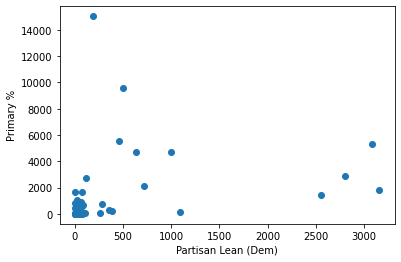

In [234]:
#Democrats
fig, ax = plt.subplots()

x=dem_totals['Partisan Lean']
y=dem_totals['Primary %']
plt.xlabel('Partisan Lean (Dem)')
plt.ylabel('Primary %')
plt.scatter(x, y)

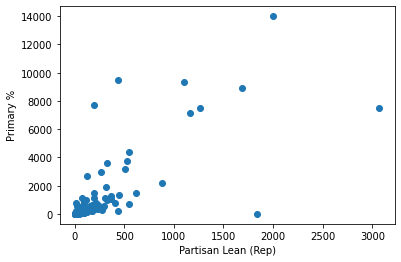

In [235]:
#Republicans
fig, ax = plt.subplots()

x=rep_totals['Partisan Lean']*-1
y=rep_totals['Primary %']
plt.xlabel('Partisan Lean (Rep)')
plt.ylabel('Primary %')
plt.scatter(x, y)



## 2. Endorsements and Election Outcome

In [236]:
rep.columns

Index(['Candidate', 'State', 'District', 'Office Type', 'Race Type',
       'Race Primary Election Date', 'Primary Status', 'Primary Runoff Status',
       'General Status', 'Primary %', 'Won Primary', 'Rep Party Support?',
       'Trump Endorsed?', 'Bannon Endorsed?', 'Great America Endorsed?',
       'NRA Endorsed?', 'Right to Life Endorsed?',
       'Susan B. Anthony Endorsed?', 'Club for Growth Endorsed?',
       'Koch Support?', 'House Freedom Support?', 'Tea Party Endorsed?',
       'Main Street Endorsed?', 'Chamber Endorsed?', 'No Labels Support?',
       'Won Primary 0_1'],
      dtype='object')

In [237]:
#What percent of endorsed candidates for each endorsement category end up winning the election?
dem_cats = ['Emily Endorsed?','Guns Sense Candidate?', 'Biden Endorsed?', 'Warren Endorsed? ',
       'Sanders Endorsed?', 'Our Revolution Endorsed?','Justice Dems Endorsed?', 'PCCC Endorsed?', 'Indivisible Endorsed?',
       'WFP Endorsed?', 'VoteVets Endorsed?']


dem_win_percentages = []
for cat in dem_cats:
    wins = 0
    losses = 0
    total_ends = 0
    for index, row in dem.iterrows():
        if row[cat]=='Yes' and row['Won Primary 0_1']==1:
            wins += 1
            total_ends += 1
        if row[cat]=='Yes' and row['Won Primary 0_1']==0:
            losses += 1
            total_ends += 1
    dem_win_percentages.append(wins/total_ends)
        
#What percent of endorsed candidates for each endorsement category end up winning the election?
rep_cats = ['Rep Party Support?',
       'Trump Endorsed?', 'Bannon Endorsed?', 'Great America Endorsed?',
       'NRA Endorsed?', 'Right to Life Endorsed?',
       'Susan B. Anthony Endorsed?', 'Club for Growth Endorsed?',
       'Koch Support?', 'House Freedom Support?', 'Tea Party Endorsed?',
       'Main Street Endorsed?', 'Chamber Endorsed?']


rep_win_percentages = []
for cat in rep_cats:
    wins = 0
    losses = 0
    total_ends = 0
    for index, row in rep.iterrows():
        if row[cat]=='Yes' and row['Won Primary 0_1']==1:
            wins += 1
            total_ends += 1
        if row[cat]=='Yes' and row['Won Primary 0_1']==0:
            losses += 1
            total_ends += 1
    rep_win_percentages.append(wins/total_ends)
        
endorsement = ['Emily Endorsed','Guns Sense Candidate', 'Biden Endorsed', 'Warren Endorsed',
       'Sanders Endorsed', 'Our Revolution Endorsed','Justice Dems Endorsed', 'PCCC Endorsed', 'Indivisible Endorsed',
       'WFP Endorsed', 'VoteVets Endorsed']
d_df = pd.DataFrame({"Endorsement":endorsement,"Win Proportion":dem_win_percentages})


r_endorsement = ['Rep Party Support',
       'Trump Endorsed', 'Bannon Endorsed', 'Great America Endorsed',
       'NRA Endorsed', 'Right to Life Endorsed',
       'Susan B. Anthony Endorsed', 'Club for Growth Endorsed',
       'Koch Support', 'House Freedom Support', 'Tea Party Endorsed',
       'Main Street Endorsed', 'Chamber Endorsed']
r_df = pd.DataFrame({"Endorsement":r_endorsement,"Win Proportion":rep_win_percentages})

In [238]:
d_df = d_df.sort_values(by="Win Proportion", ascending = False)

In [239]:
d_df

,Endorsement,Win Proportion
2,Biden Endorsed,1.000000
3,Warren Endorsed,1.000000
0,Emily Endorsed,0.722222
7,PCCC Endorsed,0.666667
8,Indivisible Endorsed,0.652174
10,VoteVets Endorsed,0.571429
4,Sanders Endorsed,0.555556
9,WFP Endorsed,0.500000
1,Guns Sense Candidate,0.411458
6,Justice Dems Endorsed,0.320000


In [240]:
r_df = r_df.sort_values(by="Win Proportion", ascending = False)
r_df

,Endorsement,Win Proportion
1,Trump Endorsed,0.882353
8,Koch Support,0.857143
2,Bannon Endorsed,0.750000
3,Great America Endorsed,0.714286
11,Main Street Endorsed,0.647059
10,Tea Party Endorsed,0.625000
12,Chamber Endorsed,0.625000
0,Rep Party Support,0.619048
7,Club for Growth Endorsed,0.619048
4,NRA Endorsed,0.571429


## Average Contribution Size and Election Outcome

Text(0, 0.5, 'Primary %')

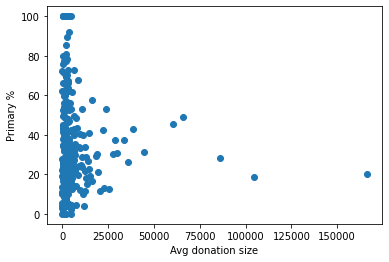

In [255]:
plt.scatter(x=avg_contributions['Avg Donation Size'],y=avg_contributions['Primary %'])
plt.xlabel('Avg donation size')
plt.ylabel('Primary %')